In [103]:
import pandas as pd
import time
import datetime
import matplotlib.pyplot as plt
import numpy as np

from sklearn.tree import export_graphviz, DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.model_selection import cross_val_score, train_test_split, GridSearchCV
from sklearn.metrics import confusion_matrix, accuracy_score, mean_squared_error, precision_score, recall_score
from sklearn.datasets import load_breast_cancer, load_boston

import itertools

#

In [2]:
df = pd.read_csv('data/churn_train.csv')

In [3]:
df.head()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,city,last_trip_date,phone,signup_date,surge_pct,trips_in_first_30_days,luxury_car_user,weekday_pct
0,6.94,5.0,5.0,1.00,Astapor,2014-05-03,Android,2014-01-12,0.0,0,False,100.0
1,8.06,5.0,5.0,1.00,Astapor,2014-01-26,Android,2014-01-25,0.0,2,True,0.0
2,21.50,4.0,NaN,1.00,Winterfell,2014-05-21,iPhone,2014-01-02,0.0,1,True,100.0
3,9.46,5.0,NaN,2.75,Winterfell,2014-01-10,Android,2014-01-09,100.0,1,False,100.0
4,13.77,5.0,NaN,1.00,Winterfell,2014-05-13,iPhone,2014-01-31,0.0,0,False,100.0


In [4]:
df.describe()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,surge_pct,trips_in_first_30_days,weekday_pct
count,40000.000000,39838.000000,33472.000000,40000.000000,40000.000000,40000.000000,40000.000000
mean,5.791302,4.777434,4.601697,1.074956,8.857342,2.280700,60.874382
std,5.708056,0.448088,0.614810,0.222427,20.014008,3.811289,37.089619
min,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000
25%,2.420000,4.700000,4.300000,1.000000,0.000000,0.000000,33.300000
50%,3.880000,5.000000,4.900000,1.000000,0.000000,1.000000,66.700000
75%,6.930000,5.000000,5.000000,1.050000,8.300000,3.000000,100.000000
max,160.960000,5.000000,5.000000,8.000000,100.000000,125.000000,100.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 12 columns):
avg_dist                  40000 non-null float64
avg_rating_by_driver      39838 non-null float64
avg_rating_of_driver      33472 non-null float64
avg_surge                 40000 non-null float64
city                      40000 non-null object
last_trip_date            40000 non-null object
phone                     39681 non-null object
signup_date               40000 non-null object
surge_pct                 40000 non-null float64
trips_in_first_30_days    40000 non-null int64
luxury_car_user           40000 non-null bool
weekday_pct               40000 non-null float64
dtypes: bool(1), float64(6), int64(1), object(4)
memory usage: 3.4+ MB


In [6]:
df['last_trip_date'] = pd.to_datetime(df['last_trip_date'])

In [7]:
df['signup_date'] = pd.to_datetime(df['signup_date'])

In [8]:
date = pd.to_datetime('2014-06-01')

In [9]:
df['churn'] = df['last_trip_date'] < date

In [10]:
df.head(20)

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,city,last_trip_date,phone,signup_date,surge_pct,trips_in_first_30_days,luxury_car_user,weekday_pct,churn
0,6.94,5.0,5.0,1.00,Astapor,2014-05-03,Android,2014-01-12,0.0,0,False,100.0,True
1,8.06,5.0,5.0,1.00,Astapor,2014-01-26,Android,2014-01-25,0.0,2,True,0.0,True
2,21.50,4.0,NaN,1.00,Winterfell,2014-05-21,iPhone,2014-01-02,0.0,1,True,100.0,True
3,9.46,5.0,NaN,2.75,Winterfell,2014-01-10,Android,2014-01-09,100.0,1,False,100.0,True
4,13.77,5.0,NaN,1.00,Winterfell,2014-05-13,iPhone,2014-01-31,0.0,0,False,100.0,True
5,14.51,5.0,NaN,1.00,Astapor,2014-04-22,iPhone,2014-01-29,0.0,0,True,100.0,True
6,4.87,4.7,4.0,1.00,Astapor,2014-04-21,Android,2014-01-18,0.0,0,False,66.7,True
7,1.78,4.0,5.0,1.00,Winterfell,2014-01-12,iPhone,2014-01-11,0.0,3,False,0.0,True
8,6.87,5.0,4.7,1.00,Astapor,2014-01-30,Android,2014-01-01,0.0,3,False,66.7,True
9,2.41,5.0,3.0,1.00,Winterfell,2014-01-29,iPhone,2014-01-28,0.0,1,False,100.0,True


In [11]:
df['avg_rating_of_driver'].mean()

4.601696940726505

In [12]:
df['avg_rating_of_driver']= df['avg_rating_of_driver'].fillna(value =df['avg_rating_of_driver'].mean())

In [13]:
df.head()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,city,last_trip_date,phone,signup_date,surge_pct,trips_in_first_30_days,luxury_car_user,weekday_pct,churn
0,6.94,5.0,5.000000,1.00,Astapor,2014-05-03,Android,2014-01-12,0.0,0,False,100.0,True
1,8.06,5.0,5.000000,1.00,Astapor,2014-01-26,Android,2014-01-25,0.0,2,True,0.0,True
2,21.50,4.0,4.601697,1.00,Winterfell,2014-05-21,iPhone,2014-01-02,0.0,1,True,100.0,True
3,9.46,5.0,4.601697,2.75,Winterfell,2014-01-10,Android,2014-01-09,100.0,1,False,100.0,True
4,13.77,5.0,4.601697,1.00,Winterfell,2014-05-13,iPhone,2014-01-31,0.0,0,False,100.0,True


In [14]:
df['avg_rating_by_driver']= df['avg_rating_by_driver'].fillna(value =df['avg_rating_by_driver'].mean())

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 13 columns):
avg_dist                  40000 non-null float64
avg_rating_by_driver      40000 non-null float64
avg_rating_of_driver      40000 non-null float64
avg_surge                 40000 non-null float64
city                      40000 non-null object
last_trip_date            40000 non-null datetime64[ns]
phone                     39681 non-null object
signup_date               40000 non-null datetime64[ns]
surge_pct                 40000 non-null float64
trips_in_first_30_days    40000 non-null int64
luxury_car_user           40000 non-null bool
weekday_pct               40000 non-null float64
churn                     40000 non-null bool
dtypes: bool(2), datetime64[ns](2), float64(6), int64(1), object(2)
memory usage: 3.4+ MB


In [16]:
df['phone']= df['phone'].fillna(value ='other')

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 13 columns):
avg_dist                  40000 non-null float64
avg_rating_by_driver      40000 non-null float64
avg_rating_of_driver      40000 non-null float64
avg_surge                 40000 non-null float64
city                      40000 non-null object
last_trip_date            40000 non-null datetime64[ns]
phone                     40000 non-null object
signup_date               40000 non-null datetime64[ns]
surge_pct                 40000 non-null float64
trips_in_first_30_days    40000 non-null int64
luxury_car_user           40000 non-null bool
weekday_pct               40000 non-null float64
churn                     40000 non-null bool
dtypes: bool(2), datetime64[ns](2), float64(6), int64(1), object(2)
memory usage: 3.4+ MB


In [18]:
df.columns

Index(['avg_dist', 'avg_rating_by_driver', 'avg_rating_of_driver', 'avg_surge',
       'city', 'last_trip_date', 'phone', 'signup_date', 'surge_pct',
       'trips_in_first_30_days', 'luxury_car_user', 'weekday_pct', 'churn'],
      dtype='object')

In [19]:
def boo(x):
    if x == True:
        return 1
    elif x ==False:
        return 0

In [20]:
df['luxury_car_user'] = df['luxury_car_user'].map(lambda x : boo(x))
df['churn'] = df['churn'].map(lambda x : boo(x))

In [132]:
df.head()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,city,last_trip_date,phone,signup_date,surge_pct,trips_in_first_30_days,luxury_car_user,weekday_pct,churn
0,6.94,5.0,5.000000,1.00,Astapor,2014-05-03,Android,2014-01-12,0.0,0,0,100.0,1
1,8.06,5.0,5.000000,1.00,Astapor,2014-01-26,Android,2014-01-25,0.0,2,1,0.0,1
2,21.50,4.0,4.601697,1.00,Winterfell,2014-05-21,iPhone,2014-01-02,0.0,1,1,100.0,1
3,9.46,5.0,4.601697,2.75,Winterfell,2014-01-10,Android,2014-01-09,100.0,1,0,100.0,1
4,13.77,5.0,4.601697,1.00,Winterfell,2014-05-13,iPhone,2014-01-31,0.0,0,0,100.0,1


In [22]:
test = ['avg_dist', 'avg_rating_by_driver', 'avg_rating_of_driver', 'avg_surge',\
       'city', 'last_trip_date', 'phone', 'signup_date', 'surge_pct',\
       'trips_in_first_30_days', 'weekday_pct', 'luxury_car_user', 'churn']

In [133]:
from pandas.tools.plotting import scatter_matrix
pd.scatter_matrix(df[test], figsize=(20, 20))
plt.show()

ValueError: Must pass DataFrame with boolean values only

### the data is not clearly separable for a logistic regrassion to work well. for that reason we are going to skip it and try random forest and SGD boosting. 

In [24]:
df_test = pd.read_csv('data/churn_test.csv')
df_test.head()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,city,last_trip_date,phone,signup_date,surge_pct,trips_in_first_30_days,luxury_car_user,weekday_pct
0,2.48,5.0,5.0,1.0,Winterfell,2014-01-07,Android,2014-01-06,0.0,2,True,100.0
1,10.81,5.0,5.0,1.0,Winterfell,2014-04-29,iPhone,2014-01-06,0.0,3,True,100.0
2,12.95,5.0,5.0,1.0,Astapor,2014-01-29,Android,2014-01-19,0.0,1,True,100.0
3,3.92,5.0,NaN,1.0,Winterfell,2014-02-16,iPhone,2014-01-09,0.0,0,False,0.0
4,1.46,5.0,4.5,1.0,Astapor,2014-01-09,iPhone,2014-01-07,0.0,2,False,100.0


In [25]:
df.city.unique()

array(['Astapor', 'Winterfell', "King's Landing"], dtype=object)

In [26]:
df.phone.unique()

array(['Android', 'iPhone', 'other'], dtype=object)

In [27]:
df2 = df

In [28]:
cities = pd.get_dummies(df['city'])
phone = pd.get_dummies(df['phone'])

In [29]:
df2 = pd.concat([df2, cities, phone], axis = 1)

In [30]:
df2.pop('city')
df2.pop('phone')
df2.pop('last_trip_date')
df2.head(1)

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,signup_date,surge_pct,trips_in_first_30_days,luxury_car_user,weekday_pct,churn,Astapor,King's Landing,Winterfell,Android,iPhone,other
0,6.94,5.0,5.0,1.0,2014-01-12,0.0,0,0,100.0,1,1,0,0,1,0,0


In [31]:
end_date = pd.to_datetime('2014-07-01')

In [32]:
df2['total_days_member'] = (end_date - df2['signup_date']).dt.days

In [33]:
df2.pop('signup_date')


0       2014-01-12
1       2014-01-25
2       2014-01-02
3       2014-01-09
4       2014-01-31
5       2014-01-29
6       2014-01-18
7       2014-01-11
8       2014-01-01
9       2014-01-28
10      2014-01-18
11      2014-01-26
12      2014-01-05
13      2014-01-19
14      2014-01-14
15      2014-01-16
16      2014-01-25
17      2014-01-07
18      2014-01-10
19      2014-01-26
20      2014-01-14
21      2014-01-28
22      2014-01-15
23      2014-01-07
24      2014-01-26
25      2014-01-25
26      2014-01-12
27      2014-01-04
28      2014-01-03
29      2014-01-06
           ...    
39970   2014-01-23
39971   2014-01-08
39972   2014-01-25
39973   2014-01-06
39974   2014-01-17
39975   2014-01-18
39976   2014-01-07
39977   2014-01-18
39978   2014-01-27
39979   2014-01-20
39980   2014-01-21
39981   2014-01-11
39982   2014-01-06
39983   2014-01-30
39984   2014-01-18
39985   2014-01-15
39986   2014-01-22
39987   2014-01-05
39988   2014-01-06
39989   2014-01-15
39990   2014-01-23
39991   2014

In [34]:
# def boo(x):
#     if x == True:
#         return 1
#     elif x ==False:
#         return 0

In [82]:
def transform(df):
    df['last_trip_date'] = pd.to_datetime(df['last_trip_date'])
    df['signup_date'] = pd.to_datetime(df['signup_date'])
    date = pd.to_datetime('2014-06-01')
    df['churn'] = df['last_trip_date'] < date
    # we are filling some nan with mean values
    df['avg_rating_of_driver']= df['avg_rating_of_driver'].fillna(value =df['avg_rating_of_driver'].mean())
    df['avg_rating_by_driver']= df['avg_rating_by_driver'].fillna(value =df['avg_rating_by_driver'].mean())
    df['phone']= df['phone'].fillna(value ='other')
    
    # this will allow us to fix the boolean issues we are having.
    df['luxury_car_user'] = df['luxury_car_user'].map(lambda x : boo(x))
    df['churn'] = df['churn'].map(lambda x : boo(x))
    df2 = df
    cities = pd.get_dummies(df['city'])
    phone = pd.get_dummies(df['phone'])
    # this will create a new dataframe with the dummies variables and delete the original columns
    df2 = pd.concat([df2, cities, phone], axis = 1)
    df2.pop('city')
    df2.pop('phone')
    # we don't need to have the last_trip_date column anymore, so we will drop it.
    df2.pop('last_trip_date')
    # this will create a column with the number of days of membership and pop out the signup_date
    end_date = pd.to_datetime('2014-07-01')
    df2['total_days_member'] = (end_date - df2['signup_date']).dt.days
    df2.pop('signup_date')
        
    return df2

In [36]:
y = df2.pop('churn').values
y

array([1, 1, 1, ..., 0, 1, 0])

In [37]:
X = df2.values
X

array([[  6.94      ,   5.        ,   5.        , ...,   0.        ,
          0.        , 170.        ],
       [  8.06      ,   5.        ,   5.        , ...,   0.        ,
          0.        , 157.        ],
       [ 21.5       ,   4.        ,   4.60169694, ...,   1.        ,
          0.        , 180.        ],
       ...,
       [  3.04      ,   5.        ,   5.        , ...,   0.        ,
          0.        , 178.        ],
       [  3.49      ,   4.3       ,   3.3       , ...,   1.        ,
          0.        , 174.        ],
       [  4.25      ,   4.7       ,   5.        , ...,   1.        ,
          0.        , 164.        ]])

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [45]:
df2.columns

Index(['avg_dist', 'avg_rating_by_driver', 'avg_rating_of_driver', 'avg_surge',
       'surge_pct', 'trips_in_first_30_days', 'luxury_car_user', 'weekday_pct',
       'Astapor', 'King's Landing', 'Winterfell', 'Android', 'iPhone', 'other',
       'total_days_member'],
      dtype='object')

In [41]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
print("score:", rf.score(X_test, y_test))

/home/victor/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


score: 0.758


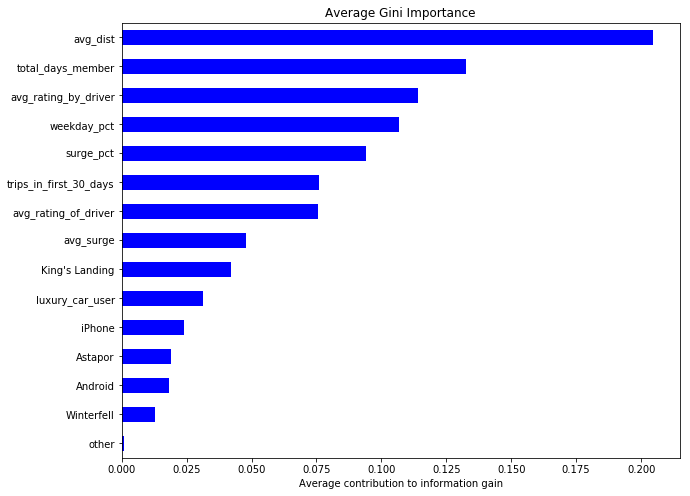

In [46]:
# Plot the feature importance
feat_scores = pd.Series(rf.feature_importances_,
                           index=df2.columns)
feat_scores = feat_scores.sort_values()
ax = feat_scores.plot(kind='barh', 
                      figsize=(10,8),
                      color='b')
ax.set_title('Average Gini Importance')
ax.set_xlabel('Average contribution to information gain');

## Grid search testing

In [66]:
model = RandomForestClassifier()
#depth_param = np.arange(1, 12, 1)
#num_samples_param = np.arange(5,95,10)
n_trees = np.arange(1,70, 10)
parameters = {'n_estimators': n_trees}
clf = GridSearchCV(model, parameters, cv=10, n_jobs=-1)
clf.fit(X_train,y_train)
print('Accuracy score: {:.3}'.format(clf.score(X_test, y_test)))

Accuracy score: 0.774


In [67]:
clf.best_estimator_

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=61, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [81]:
nrf = RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=10, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=5, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=61, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)
nrf.fit(X_train,y_train)
print('Accuracy score: {:.3}'.format(nrf.score(X_test, y_test)))

Accuracy score: 0.79


In [83]:
test = transform(df_test)

In [85]:
y_test2 = test.pop('churn').values
X_test2 = test.values

In [89]:
nrf = RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=10, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=5, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=61, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)
nrf.fit(X,y)
print('Accuracy score: {:.3}'.format(nrf.score(X_test2, y_test2)))

Accuracy score: 0.776


## After training with the whole data and testing, we are getting a .776 accuracy

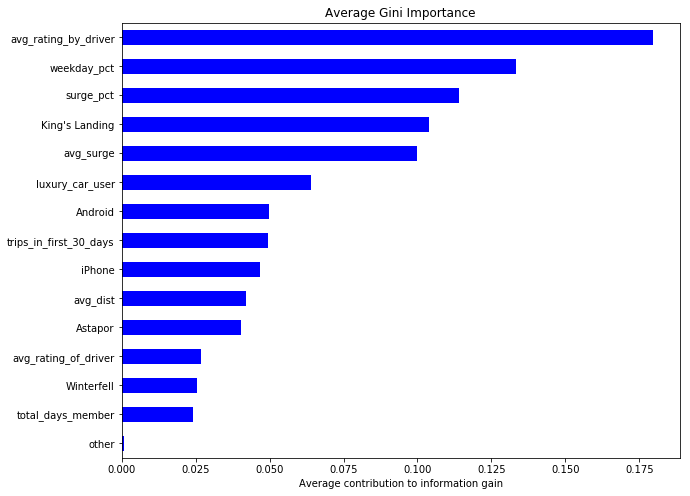

In [91]:
# Plot the feature importance
feat_scores = pd.Series(nrf.feature_importances_,
                           index=test.columns)
feat_scores = feat_scores.sort_values()
ax = feat_scores.plot(kind='barh', 
                      figsize=(10,8),
                      color='b')
ax.set_title('Average Gini Importance')
ax.set_xlabel('Average contribution to information gain');

### Confusion matrix work

In [101]:
y_predict = nrf.predict(X_test2)
cm = confusion_matrix(y_test2, y_predict)

In [95]:
precision_score(y_test2, y_predict)

0.7967818831942789

In [96]:
recall_score(y_test2, y_predict)

0.8587026332691072

In [98]:
5348/(5348+880) #recall

0.8587026332691072

In [99]:
5348/(5348+1364) #precision

0.7967818831942789

In [100]:
#taken from 
# http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html#sphx-glr-auto-examples-model-selection-plot-confusion-matrix-py
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization
[[2408 1364]
 [ 880 5348]]


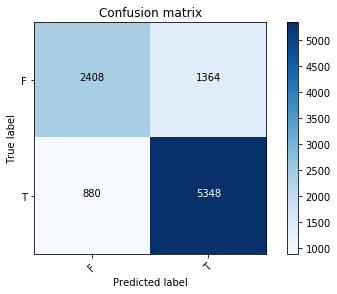

In [105]:
plot_confusion_matrix(cm,['F', 'T'])

In [129]:
df.head(1)

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,city,last_trip_date,phone,signup_date,surge_pct,trips_in_first_30_days,luxury_car_user,weekday_pct,churn
0,6.94,5.0,5.0,1.0,Astapor,2014-05-03,Android,2014-01-12,0.0,0,0,100.0,1


## Back to EDA

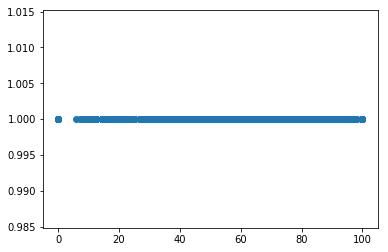

In [127]:
plt.scatter(left_df, left_df.churn)

In [112]:
left_df = df[df['churn'] == 1]

In [115]:
stay_df=  df[df['churn'] == 0]

(array([2.0285e+04, 9.2400e+02, 9.7800e+02, 6.9000e+02, 1.3700e+02,
        8.4300e+02, 1.1500e+02, 2.0000e+01, 8.0000e+00, 9.6800e+02]),
 array([  0.,  10.,  20.,  30.,  40.,  50.,  60.,  70.,  80.,  90., 100.]),
 <a list of 10 Patch objects>)

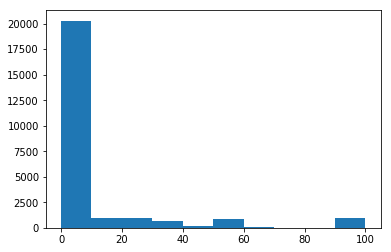

In [142]:
plt.hist(left_df.surge_pct)

(array([1.0176e+04, 2.3780e+03, 1.2870e+03, 5.2200e+02, 1.4300e+02,
        2.7900e+02, 5.4000e+01, 1.1000e+01, 3.0000e+00, 1.7900e+02]),
 array([  0.,  10.,  20.,  30.,  40.,  50.,  60.,  70.,  80.,  90., 100.]),
 <a list of 10 Patch objects>)

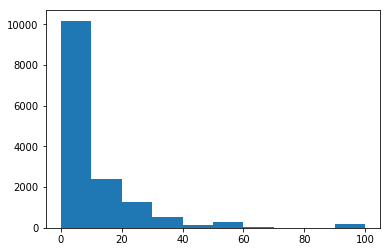

In [141]:
plt.hist(stay_df.surge_pct)

In [144]:
test_left = left_df[left_df['surge_pct']>0]
test_stay = stay_df[stay_df['surge_pct']>0]

(array([ 700., 1060.,  677.,  746.,  881.,   32.,   96.,   25.,    3.,
         968.]),
 array([  1.3 ,  11.17,  21.04,  30.91,  40.78,  50.65,  60.52,  70.39,
         80.26,  90.13, 100.  ]),
 <a list of 10 Patch objects>)

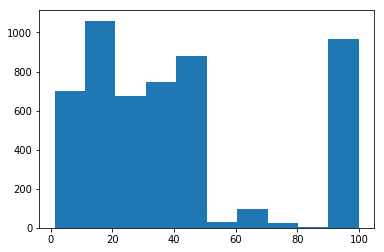

In [145]:
plt.hist(test_left.surge_pct)

(array([2.651e+03, 2.446e+03, 1.023e+03, 5.510e+02, 3.300e+02, 3.500e+01,
        3.900e+01, 1.200e+01, 2.000e+00, 1.790e+02]),
 array([  0.5 ,  10.45,  20.4 ,  30.35,  40.3 ,  50.25,  60.2 ,  70.15,
         80.1 ,  90.05, 100.  ]),
 <a list of 10 Patch objects>)

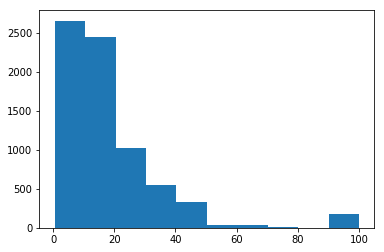

In [146]:
plt.hist(test_stay.surge_pct)

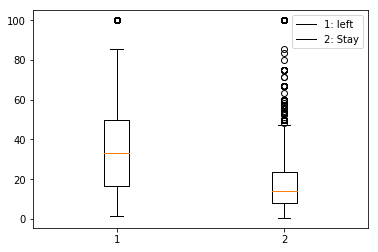

In [158]:
fig, ax = plt.subplots()
ax.boxplot([test_left.surge_pct, test_stay.surge_pct])
ax.legend(['1: left', '2: Stay'])

In [151]:
type(test_stay.surge_pct)

pandas.core.series.Series

In [159]:
df2.head()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,surge_pct,trips_in_first_30_days,luxury_car_user,weekday_pct,Astapor,King's Landing,Winterfell,total_days_member
0,6.94,5.0,5.000000,1.00,0.0,0,0,100.0,1,0,0,170
1,8.06,5.0,5.000000,1.00,0.0,2,1,0.0,1,0,0,157
2,21.50,4.0,4.601697,1.00,0.0,1,1,100.0,0,0,1,180
3,9.46,5.0,4.601697,2.75,100.0,1,0,100.0,0,0,1,173
4,13.77,5.0,4.601697,1.00,0.0,0,0,100.0,0,0,1,151


In [ ]:
cities = pd.get_dummies(df['city'])
phone = pd.get_dummies(df['phone'])

In [161]:
df3 = pd.concat([df, cities, phone], axis = 1)

In [162]:
df3.head()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,city,last_trip_date,phone,signup_date,surge_pct,trips_in_first_30_days,luxury_car_user,weekday_pct,churn,Astapor,King's Landing,Winterfell,Android,iPhone,other
0,6.94,5.0,5.000000,1.00,Astapor,2014-05-03,Android,2014-01-12,0.0,0,0,100.0,1,1,0,0,1,0,0
1,8.06,5.0,5.000000,1.00,Astapor,2014-01-26,Android,2014-01-25,0.0,2,1,0.0,1,1,0,0,1,0,0
2,21.50,4.0,4.601697,1.00,Winterfell,2014-05-21,iPhone,2014-01-02,0.0,1,1,100.0,1,0,0,1,0,1,0
3,9.46,5.0,4.601697,2.75,Winterfell,2014-01-10,Android,2014-01-09,100.0,1,0,100.0,1,0,0,1,1,0,0
4,13.77,5.0,4.601697,1.00,Winterfell,2014-05-13,iPhone,2014-01-31,0.0,0,0,100.0,1,0,0,1,0,1,0


In [163]:
left_df3 = df3[df3['churn'] == 1]
stay_df3 = df3[df3['churn'] == 0]

(array([21937.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,  3031.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

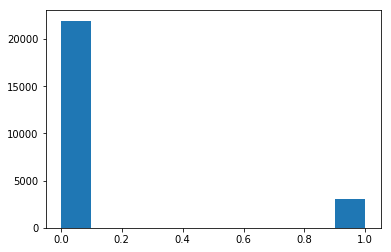

In [164]:
plt.hist(left_df3["King's Landing"])

(array([9919.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
        5113.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

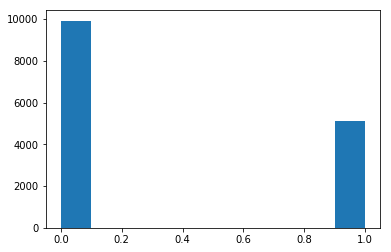

In [165]:
plt.hist(stay_df3["King's Landing"])

In [166]:
king_df3 = df3[df3["King's Landing"] == 1]
winter_df3 = df3[df3['Winterfell'] == 1]
ast_df3 = df3[df3['Astapor'] == 1]

(array([5113.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
        3031.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

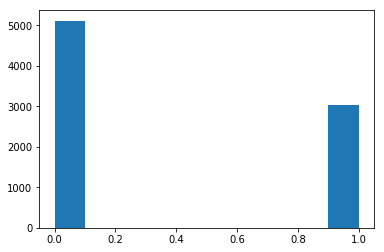

In [167]:
plt.hist(king_df3['churn'])

(array([ 6546.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0., 12074.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

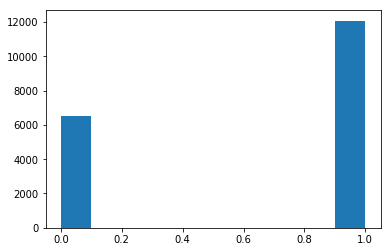

In [168]:
plt.hist(winter_df3['churn'])

(array([3373.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
        9863.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

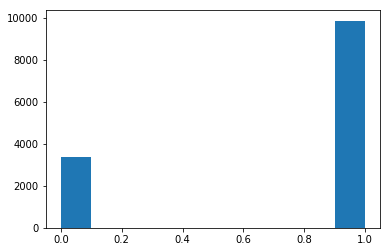

In [169]:
plt.hist(ast_df3['churn'])

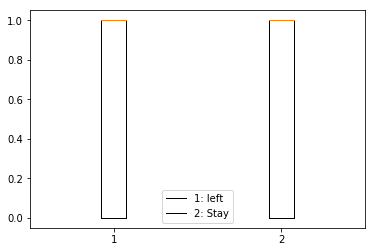

In [170]:
fig, ax = plt.subplots()
ax.boxplot([ast_df3['churn'], winter_df3['churn']])
ax.legend(['1: left', '2: Stay'])

In [180]:
perc =left_df3.groupby(by= 'city').count()/df3.groupby(by= 'city').count()
perc.head()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,last_trip_date,phone,signup_date,surge_pct,trips_in_first_30_days,luxury_car_user,weekday_pct,churn,Astapor,King's Landing,Winterfell,Android,iPhone,other
city,,,,,,,,,,,,,,,,,,
Astapor,0.745165,0.745165,0.745165,0.745165,0.745165,0.745165,0.745165,0.745165,0.745165,0.745165,0.745165,0.745165,0.745165,0.745165,0.745165,0.745165,0.745165,0.745165
King's Landing,0.372176,0.372176,0.372176,0.372176,0.372176,0.372176,0.372176,0.372176,0.372176,0.372176,0.372176,0.372176,0.372176,0.372176,0.372176,0.372176,0.372176,0.372176
Winterfell,0.648443,0.648443,0.648443,0.648443,0.648443,0.648443,0.648443,0.648443,0.648443,0.648443,0.648443,0.648443,0.648443,0.648443,0.648443,0.648443,0.648443,0.648443


<BarContainer object of 3 artists>

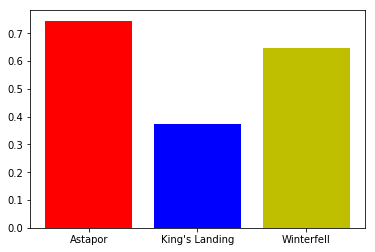

In [192]:
p.bar(perc.index.values,perc['avg_dist'], color ='rby')
ax.set_title("Events by Country", fontsize = 15)
ax.set_ylabel("Events", fontsize = 15)
ax.set_xlabel("Country", fontsize = 15)

In [189]:
perc.index.values

array(['Astapor', "King's Landing", 'Winterfell'], dtype=object)